# Age of death prediction using linear regression
Using the WHO life expectancy dataset

In [1]:
!pip install --upgrade tensorflow

In [2]:
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [3]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
data = 'life_expectancy_data.csv'
dataframe = pd.read_csv(data)

# Review the DataFrame
dataframe.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
dataframe.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


## Cleaning the data
Some cell names have trailing spaces or are composed of two separate names, I am gonna fix that and impose a more consistent naming scheme

In [5]:
# Renaming some column names as they contain trailing spaces.
dataframe.rename(columns={" BMI ":"BMI","Life expectancy ":"Life_Expectancy","Adult Mortality":"Adult_Mortality",
                   "infant deaths":"Infant_Deaths","percentage expenditure":"Percentage_Exp","Hepatitis B":"HepatitisB",
                  "Measles ":"Measles"," BMI ":"BMI","under-five deaths ":"Under_Five_Deaths","Diphtheria ":"Diphtheria",
                  " HIV/AIDS":"HIV/AIDS"," thinness  1-19 years":"thinness_1to19_years"," thinness 5-9 years":"thinness_5to9_years","Income composition of resources":"Income_Comp_Of_Resources",
                   "Total expenditure":"Tot_Exp"},inplace=True)
dataframe.head()

,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,Measles,...,Polio,Tot_Exp,Diphtheria,HIV/AIDS,GDP,Population,thinness_1to19_years,thinness_5to9_years,Income_Comp_Of_Resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [6]:
# Verifying whether data for each variable is according to its dataype or not.
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   2938 non-null   object 
 1   Year                      2938 non-null   int64  
 2   Status                    2938 non-null   object 
 3   Life_Expectancy           2928 non-null   float64
 4   Adult_Mortality           2928 non-null   float64
 5   Infant_Deaths             2938 non-null   int64  
 6   Alcohol                   2744 non-null   float64
 7   Percentage_Exp            2938 non-null   float64
 8   HepatitisB                2385 non-null   float64
 9   Measles                   2938 non-null   int64  
 10  BMI                       2904 non-null   float64
 11  Under_Five_Deaths         2938 non-null   int64  
 12  Polio                     2919 non-null   float64
 13  Tot_Exp                   2712 non-null   float64
 14  Diphther

In [7]:
# Identify percentage of null values in each column.
dataframe.isnull().sum()*100/dataframe.isnull().count()

Country                      0.000000
Year                         0.000000
Status                       0.000000
Life_Expectancy              0.340368
Adult_Mortality              0.340368
Infant_Deaths                0.000000
Alcohol                      6.603131
Percentage_Exp               0.000000
HepatitisB                  18.822328
Measles                      0.000000
BMI                          1.157250
Under_Five_Deaths            0.000000
Polio                        0.646698
Tot_Exp                      7.692308
Diphtheria                   0.646698
HIV/AIDS                     0.000000
GDP                         15.248468
Population                  22.191967
thinness_1to19_years         1.157250
thinness_5to9_years          1.157250
Income_Comp_Of_Resources     5.684139
Schooling                    5.547992
dtype: float64

Creating country_list: A list called country_list is generated by extracting the unique values from the "Country" column. This list will contain the names of all countries present in the DataFrame.
Creating fill_list: Another list named fill_list is created. It contains the names of columns that have missing values and need to be filled using interpolation. Interpolation is a method to estimate missing values based on the values of neighboring data points.
Interpolation: The code uses a loop to perform interpolation for each country separately. For each country, it selects rows belonging to that country using dataframe.loc[dataframe['Country'] == country, fill_list]. The interpolate() method is then applied to those selected rows for the columns listed in fill_list. This will fill in missing values with interpolated values based on neighboring data points for each country.

In [8]:
# save the countries in a list
country_list = dataframe.Country.unique()

# list containing incomplete columns
fill_list = ['Life_Expectancy','Adult_Mortality','Alcohol','HepatitisB','BMI','Polio','Tot_Exp','Diphtheria','GDP','Population','thinness_1to19_years','thinness_5to9_years','Income_Comp_Of_Resources','Schooling']

The reason for using iloc twice in this line is to perform interpolation only on the specific subset of the DataFrame corresponding to the current country. By doing this within a loop for each country separately, the code ensures that interpolation is performed independently for each country, maintaining the temporal continuity of the data for individual countries without interpolating across different countries. This approach prevents any potential leakage of information between different countries and helps ensure that the interpolation is performed on a per-country basis.

In [9]:
# Treat null values using interpolation.
for country in country_list:
    dataframe.loc[dataframe['Country'] == country,fill_list] = dataframe.loc[dataframe['Country'] == country,fill_list].interpolate()
    
# Drop remaining null values after interpolation.
dataframe.dropna(inplace=True)

In [10]:
# Verifying null-values after applying above methods.
dataframe.isnull().sum()

Country                     0
Year                        0
Status                      0
Life_Expectancy             0
Adult_Mortality             0
Infant_Deaths               0
Alcohol                     0
Percentage_Exp              0
HepatitisB                  0
Measles                     0
BMI                         0
Under_Five_Deaths           0
Polio                       0
Tot_Exp                     0
Diphtheria                  0
HIV/AIDS                    0
GDP                         0
Population                  0
thinness_1to19_years        0
thinness_5to9_years         0
Income_Comp_Of_Resources    0
Schooling                   0
dtype: int64

## Data analysis
We are gonna look for relevant correlations to decide which columns we will use to train our model<br>
Let's start with some general statistics about our data

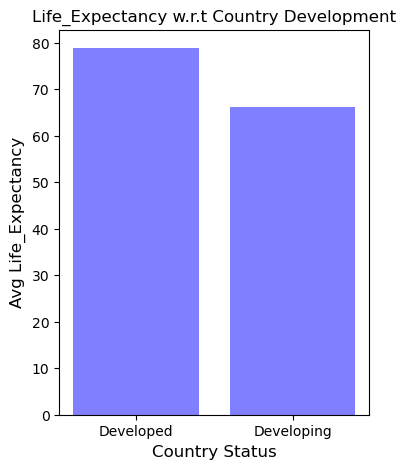

In [11]:
# Life_Expectancy w.r.t Year using bar plot.
plt.figure(figsize=(4,5))
plt.bar(dataframe.groupby('Status')['Status'].count().index,dataframe.groupby('Status')['Life_Expectancy'].mean(),color='blue',alpha=0.50)
plt.xlabel("Country Status",fontsize=12)
plt.ylabel("Avg Life_Expectancy",fontsize=12)
plt.title("Life_Expectancy w.r.t Country Development")
plt.show()

In [12]:
round(dataframe[['Status','Life_Expectancy']].groupby(['Status']).mean(),2)

,Life_Expectancy
Status,
Developed,78.83
Developing,66.16


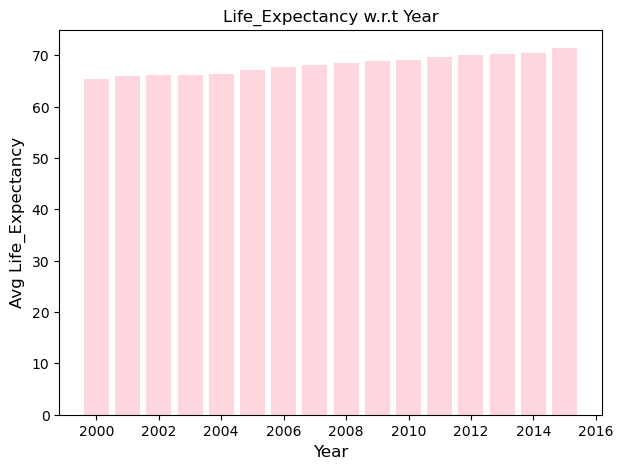

In [13]:
# Life_Expectancy w.r.t Year using bar plot.
plt.figure(figsize=(7,5))
plt.bar(dataframe.groupby('Year')['Year'].count().index,dataframe.groupby('Year')['Life_Expectancy'].mean(),color='pink',alpha=0.65)
plt.xlabel("Year",fontsize=12)
plt.ylabel("Avg Life_Expectancy",fontsize=12)
plt.title("Life_Expectancy w.r.t Year")
plt.show()

So there is a definite difference between developed countries and the rest, but at least the life expectancy improves every year.
Now let's try to figure out wich features affect life expectancy the most.

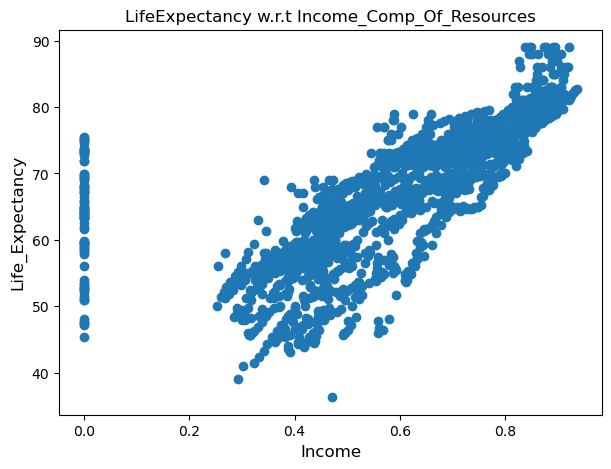

In [14]:
plt.figure(figsize=(7,5))
plt.title("LifeExpectancy w.r.t Income_Comp_Of_Resources")
plt.xlabel("Income",fontsize=12)
plt.ylabel("Life_Expectancy",fontsize=12)
plt.scatter(dataframe["Income_Comp_Of_Resources"], dataframe["Life_Expectancy"])

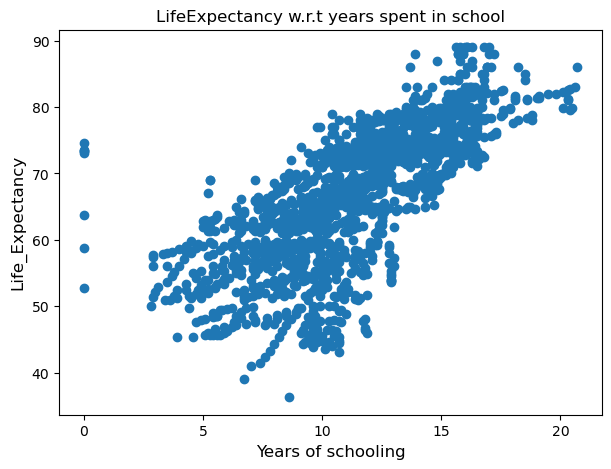

In [15]:
plt.figure(figsize=(7,5))
plt.title("LifeExpectancy w.r.t years spent in school")
plt.xlabel("Years of schooling",fontsize=12)
plt.ylabel("Life_Expectancy",fontsize=12)
plt.scatter(dataframe["Schooling"], dataframe["Life_Expectancy"])

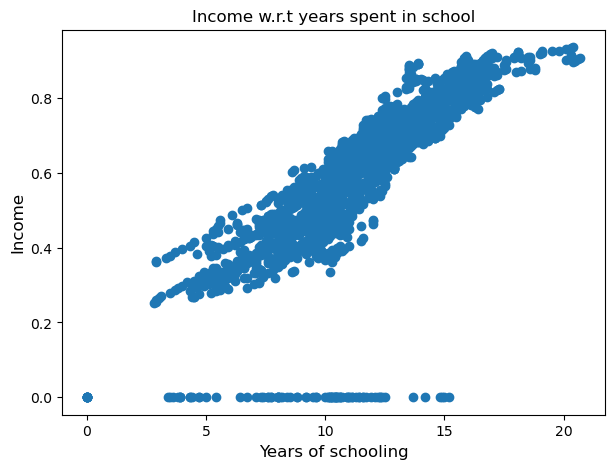

In [16]:
plt.figure(figsize=(7,5))
plt.title("Income w.r.t years spent in school")
plt.xlabel("Years of schooling",fontsize=12)
plt.ylabel("Income",fontsize=12)
plt.scatter(dataframe["Schooling"], dataframe["Income_Comp_Of_Resources"])

We can infer that schooling and income composition are positively correlated between themselves and with life expectancy

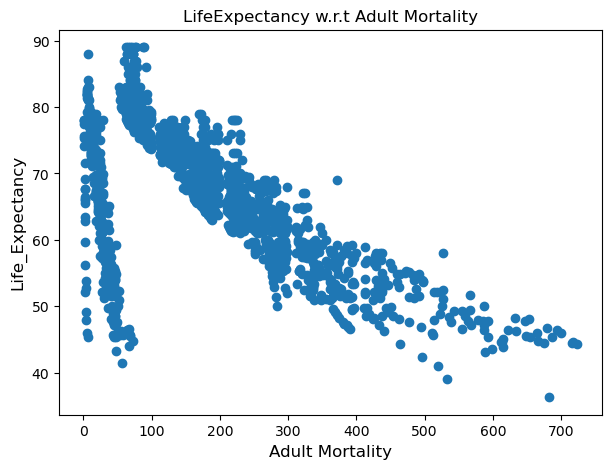

In [17]:
plt.figure(figsize=(7,5))
plt.title("LifeExpectancy w.r.t Adult Mortality")
plt.xlabel("Adult Mortality",fontsize=12)
plt.ylabel("Life_Expectancy",fontsize=12)
plt.scatter(dataframe["Adult_Mortality"], dataframe["Life_Expectancy"])

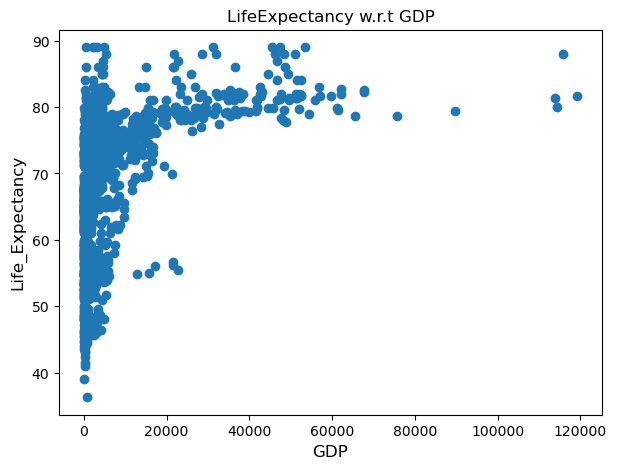

In [18]:
plt.figure(figsize=(7,5))
plt.title("LifeExpectancy w.r.t GDP")
plt.xlabel("GDP",fontsize=12)
plt.ylabel("Life_Expectancy",fontsize=12)
plt.scatter(dataframe["GDP"], dataframe["Life_Expectancy"])

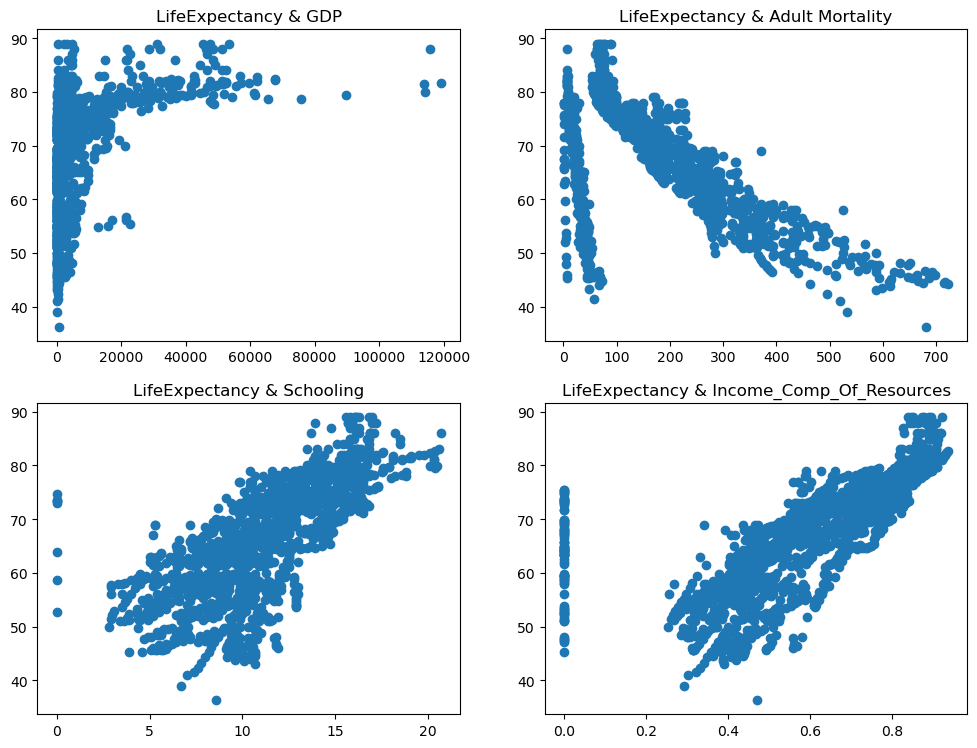

In [19]:
plt.figure(figsize=(12, 38))

plt.subplot(8,2,1)
plt.title("LifeExpectancy & GDP")
plt.scatter(dataframe["GDP"], dataframe["Life_Expectancy"])

plt.subplot(8,2,2)
plt.title("LifeExpectancy & Adult Mortality")
plt.scatter(dataframe["Adult_Mortality"], dataframe["Life_Expectancy"])

plt.subplot(8,2,3)
plt.title("LifeExpectancy & Schooling")
plt.scatter(dataframe["Schooling"], dataframe["Life_Expectancy"])

plt.subplot(8,2,4)
plt.title("LifeExpectancy & Income_Comp_Of_Resources")
plt.scatter(dataframe["Income_Comp_Of_Resources"], dataframe["Life_Expectancy"])

The four features shown above plus the status of the country will be used for building the machine learning model

## Data loaders
Now I will prepare the designated column into the data that will be used in the machine learning model

categorical_cols = ['Status']: This line creates a list categorical_cols containing the name of the column 'Status'. It suggests that the 'Status' column contains categorical data.

TARGET_COLUMN = ['Life_Expectancy']: This line creates a list TARGET_COLUMN containing the name of the target column, which is 'Life_Expectancy'. It indicates that 'Life_Expectancy' is the variable we want to predict or analyze.

In [25]:
# label the designated data
# num_rows = dataframe.index.size
# categorical_cols = ['Status']
# TARGET_COLUMN = ['Life_Expectancy']
# Preparing the dataframe for futher machine learning analysis
inputs = ['Status', 'GDP', 'Adult_Mortality', 'Schooling', 'Income_Comp_Of_Resources', 'Life_Expectancy']
dataframe_df = dataframe[inputs]
dataframe_df.head()

,Status,GDP,Adult_Mortality,Schooling,Income_Comp_Of_Resources,Life_Expectancy
0,Developing,584.259210,263.0,10.1,0.479,65.0
1,Developing,612.696514,271.0,10.0,0.476,59.9
2,Developing,631.744976,268.0,9.9,0.470,59.9
3,Developing,669.959000,272.0,9.8,0.463,59.5
4,Developing,63.537231,275.0,9.5,0.454,59.2


The drop_first=True argument is used to drop one of the dummy columns to avoid multicollinearity. As a result, you get a DataFrame with a single "Status" column containing binary values.

In [28]:
# Convert categorical data to numeric with `pd.get_dummies`
numeric_df = pd.get_dummies(dataframe_df, drop_first=True)
numeric_df.rename(columns={'Status_Developing': 'Status'}, inplace=True)
numeric_df.sample(20)

,GDP,Adult_Mortality,Schooling,Income_Comp_Of_Resources,Life_Expectancy,Status
1023,39.484473,31.0,7.6,0.484,57.6,1
2567,17.815972,194.0,9.7,0.535,64.0,1
1188,1452.195373,187.0,11.5,0.599,67.6,1
1960,12593.737400,119.0,13.0,0.780,77.6,1
1799,5749.447520,232.0,11.5,0.619,65.8,1
2250,152.443873,192.0,9.1,0.483,66.4,1
1657,146.838510,215.0,7.1,0.476,61.7,1
1805,3881.295350,431.0,11.4,0.570,57.0,1
393,4513.136280,161.0,13.5,0.750,72.2,0
1841,35245.164700,8.0,16.5,0.881,78.7,0


In [29]:
# Split our preprocessed data into our features and target arrays
y = numeric_df["Status"].values.reshape(-1,1)
X = numeric_df.drop(["Status"],1) 

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

C:\Users\panka\AppData\Local\Temp\ipykernel_20736\4188055797.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = numeric_df.drop(["Status"],1)


In [30]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

Compile, Train and Evaluate the Model

For this neural network model, I chose four hidden layers with 80,30, 10, and 5 neurons respectively. After several iterations and tests with different numbers of neurons and layers, this combination produced the best results in terms of accuracy and loss. For the activation functions, I chose ReLU for the first hidden layer to introduce non-linearity in the model and improve its performance. I selected sigmoid for the second, tanh for the third and soft-max for the fourth to increase accuracy of the model. For the final output layer, I used sigmoid activation function to ensure the output is between 0 and 1, which is needed for binary classification.

In [31]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train.values[0])

hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30
hidden_nodes_layer3 = 10
hidden_nodes_layer4 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="sigmoid"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="tanh"))

# Fourth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="softmax"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                480       
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 10)                310       
                                                                 
 dense_3 (Dense)             (None, 5)                 55        
                                                                 
 dense_4 (Dense)             (None, 1)                 6         
                                                                 
Total params: 3281 (12.82 KB)
Trainable params: 3281 (12.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [33]:
# Create directory if it does not exist
if not os.path.exists('C:/Users/panka/OneDrive/Desktop/Class Folder/Github/Machine-learning-projects/Age prediction work/models/model_1'):
    os.makedirs('C:/Users/panka/OneDrive/Desktop/Class Folder/Github/Machine-learning-projects/Age prediction work/models/model_1')

# Define the checkpoint path
checkpoint_path = "C:/Users/panka/OneDrive/Desktop/Class Folder/Github/Machine-learning-projects/Age prediction work/models/model_1/weights.{epoch:02d}.hdf5"

# Create the checkpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch',
    period = 5
)

In [34]:
# Train the model
nn.fit(X_train_scaled, y_train, epochs=100,callbacks=[checkpoint_callback])

Epoch 1/100
47/47 [==============================] - 1s 1ms/step - loss: 0.5416 - accuracy: 0.8483
Epoch 2/100
47/47 [==============================] - 0s 1ms/step - loss: 0.4684 - accuracy: 0.8483
Epoch 3/100
47/47 [==============================] - 0s 1ms/step - loss: 0.4206 - accuracy: 0.8564
Epoch 4/100
47/47 [==============================] - 0s 1ms/step - loss: 0.3845 - accuracy: 0.9007
Epoch 5/100
35/47 [=====================>........] - ETA: 0s - loss: 0.3712 - accuracy: 0.8973
Epoch 5: saving model to C:/Users/panka/OneDrive/Desktop/Class Folder/Github/Machine-learning-projects/Age prediction work/models/model_1\weights.05.hdf5
47/47 [==============================] - 0s 3ms/step - loss: 0.3634 - accuracy: 0.9040
Epoch 6/100
47/47 [==============================] - 0s 1ms/step - loss: 0.3464 - accuracy: 0.9114
Epoch 7/100
47/47 [==============================] - 0s 958us/step - loss: 0.3335 - accuracy: 0.9121
Epoch 8/100
47/47 [==============================] - 0s 1ms/step - l

47/47 [==============================] - 0s 1ms/step - loss: 0.1799 - accuracy: 0.9342
Epoch 57/100
47/47 [==============================] - 0s 1ms/step - loss: 0.1780 - accuracy: 0.9369
Epoch 58/100
47/47 [==============================] - 0s 1ms/step - loss: 0.1785 - accuracy: 0.9349
Epoch 59/100
47/47 [==============================] - 0s 1ms/step - loss: 0.1760 - accuracy: 0.9376
Epoch 60/100
 1/47 [..............................] - ETA: 0s - loss: 0.1203 - accuracy: 0.9688
Epoch 60: saving model to C:/Users/panka/OneDrive/Desktop/Class Folder/Github/Machine-learning-projects/Age prediction work/models/model_1\weights.60.hdf5
47/47 [==============================] - 0s 1ms/step - loss: 0.1762 - accuracy: 0.9336
Epoch 61/100
47/47 [==============================] - 0s 997us/step - loss: 0.1775 - accuracy: 0.9329
Epoch 62/100
47/47 [==============================] - 0s 1ms/step - loss: 0.1756 - accuracy: 0.9322
Epoch 63/100
47/47 [==============================] - 0s 1ms/step - loss:

In [35]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

16/16 - 0s - loss: 0.1705 - accuracy: 0.9215 - 109ms/epoch - 7ms/step
Loss: 0.1705012172460556, Accuracy: 0.9215291738510132


In [36]:
# Export our model to HDF5 file
nn.save('C:/Users/panka/OneDrive/Desktop/Class Folder/Github/Machine-learning-projects/Age prediction work/models/model_1/Age_of_death_prediction.h5')

C:\Users\panka\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


I have developed a successful deep neural network model using TensorFlow and Keras to predict if an Age_of_death_predictions by WHO would be successful. Through several iterations for the optimal model, I am able to achieve a final accuracy score of 92.15%. This model could be a valuable tool for WHO in selecting the country as the developed or developing with the best chance of success.

Predictions

In [ ]:
def predict_single(x, model):
    xb = x.unsqueeze(0)
    return model(x).item()

In [ ]:
x, target = val_ds[10]
pred = predict_single(x, model)
print("Input: ", x)
print("Target: ", target.item())
print("Prediction:", pred)

In [ ]:
x, target = val_ds[17]
pred = predict_single(x, model)
print("Input: ", x)
print("Target: ", target.item())
print("Prediction:", pred)

In [ ]:
x, target = val_ds[23]
pred = predict_single(x, model)
print("Input: ", x)
print("Target: ", target.item())
print("Prediction:", pred)

In [ ]:
# final parameters
list(model.parameters())

In [ ]:
# save the model to disk
filename = 'linear_regression.pkl'
pickle.dump(model, open(filename, 'wb'))